<font size = "3"> Aroon Sankoh (aroonjsankoh@gmail.com) </font> 

# Python Lists vs. Numpy Arrays

## Introduction

In this project, I will be exploring the difference in how Python lists and Numpy (the popular Python library) arrays are implemented. As of now, I generally understand that Python lists (while indexable) are implemented with pointers, whereas Numpy arrays are implemented with indeces. To make an analogy to other high-level programming languages, Python lists seem to most closely resemble Java arraylists, whereas Numpy arrays seem to most closely resemble C++ vectors. I will look at the differences in the time complexities of finding, adding, and deleting elements between the two data structures to learn which implementation proves more efficient and when.

## Setup

All data used is downloaded from the Scikit-Learn Python library. I will be using a real life dataset of median home values in California in 1990, originally retrieved from the StatLib repository at https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html. There are 20,640 total instancs in this data set, and since Scikit-Learn is a machine learning library, this data set consists nine variables total: A target value (the median home value per $100,000) and eight attributes to predict that value. We will use the target value,  median home value, in our experiment. 

In [1]:
%pip install --upgrade scikit-learn==1.2.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn import datasets 

The function datasets.fetch_california_housing(data_home=None, download_if_missing=True, return_X_y=False, as_frame=False) will return all the data on the attributes and target value in one dictionary, so we will use the function below to store the data into two Numpy arrays. "attr" will hold the data on attributes and "target" will hold the data on target values. Note that for our purposes, we only interested in the target array.

In [3]:
attr, target = datasets.fetch_california_housing(data_home=None, download_if_missing=True, return_X_y=True, as_frame=False)

Now we have an array 'target' of home values. 

I will use two large lists to store the differently sized lists and arrays I will be testing. First, I will initialize two empty lists called "manyLists" and "manyArrays". The list manyLists will store Python lists ranging from size 100 to 2e4, and the list manyArrays will store Numpy arrays ranging from size 100 to 2e4. 

In [4]:
import numpy as np 
manyLists = []
manyArrays = []

Next, I will create lists of various sizes from the data in target and store all of them in manyLists. The lists will be in increasing order of size, so an element i in manyLists will always be smaller than i+1 and larger than i-1.

In [5]:
import random 

i = 100
while (i < 2e4):
    list = []
    for j in range(i):
        list.append(random.choice(target))
    manyLists.append(list)
    i *= 1.1
    i = int(i)

I will also create arrays of various sizes from target and store all of them in manyArrays. Like manyLists, the arrays in manyArrays will be in increasing order of size.

In [6]:
i = 100
while (i < 2e4):
    list = []
    for j in range(i):
        list.append(random.choice(target))
    arr = np.array(list)
    manyArrays.append(arr)
    i *= 1.1
    i = int(i)

## Data Collection

I will first test the execution time of finding, adding, and deleting an element in a <font size= "4"> <u>Python List</u></font>. I will use the Python timeit module to measure the execution time of each function and store them in other lists.

The **index()** function is used to find the first occurence of an element in a Python list. The timeit function from timeit module will run index() on a randomly selected element from the target list 1e6 times. Randomly selecting an element will increase the execution time, but I will do this when recording the find times for Numpy arrays so it will not affect our comparison between the two data structures. I will store each estimate for the execution time in a list *findListEstimates*.

<span style = "color:red"> *Note that even though the timeit function runs 1e6 times by default, I will run it a specificed number of times depending on how costly the function I'm timing is or if the size of the list constrains how many times the function can be run*

In [7]:
from timeit import timeit

indexListEstimates = []
def indexrandelement(lists, int):
    e = random.choice(lists[int])
    lists[int].index(e)

for i in range(len(manyLists)):
    timeElapsed = timeit(lambda: indexrandelement(manyLists, i), number = 1000)
    indexListEstimates.append(timeElapsed)

The **append()** function is used to add an element to the end of a Python list. I will use timeit to obtain estimates for the execution time of appending an element '0' to a Python list and store them in a list *appendListEstimates*. 

In [8]:
appendListEstimates = []
def appendelement(lists, int):
    lists[int].append(0)

for i in range(len(manyLists)):
    timeElapsed = timeit(lambda: appendelement(manyLists, i))
    appendListEstimates.append(timeElapsed)

The **insert()** function is used to insert an element into a specified index within a Python list. I will use timeit to obtain estimates for the execution time of adding an element '0' into a randomly selected position within a Python list and store them in a list *insertListEstimates*.

In [9]:
insertListEstimates = []
def insertelement(lists, int): 
    i = random.randrange(len(lists[int]))
    lists[int].insert(i, 0)

for i in range(len(manyLists)):
    timeElapsed = timeit(lambda: insertelement(manyLists, i), number = 1000)
    insertListEstimates.append(timeElapsed)

The **pop()** function is used to pop the last element of a Python list. I will use timeit to obtain estimates for the execution time of popping the last element in a Python list and store them in a list *popListEstimates*.

In [10]:
popListEstimates = []
def popelement(lists, int):
    lists[int].pop()
    
for i in range(len(manyLists)):
    timeElapsed = timeit(lambda: popelement(manyLists, i))
    popListEstimates.append(timeElapsed)

The **pop()** function can also be used to pop the element of a specified index within a Python list. I will used timeit to obstain estimates for the execution time of popping a random element and store them in a list *removeListEstimates*.

In [11]:
removeListEstimates = []
def removeelement(lists, int): 
    i = random.randrange(len(lists[int]))
    lists[int].pop(i)

for i in range(len(manyLists)):
    timeElapsed = timeit(lambda: removeelement(manyLists, i), number = 100)
    removeListEstimates.append(timeElapsed)

Now I will test the execution time of finding, adding, and deleting an element in a <font size= "4"> <u>Numpy array</u></font>. I will use the Python timeit module to measure the execution time of each function and store them in other lists.

The **where()** function is used to find the first occurence of an element in a Numpy array. I will use it to obtain execution times for finding a randomly selected element within a Numpy array, and I will store each estimate in a list *findArrayEstimates*.

In [12]:
whereArrayEstimates = []
def whererandelement(arrays, int):
    e = random.choice(arrays[int])
    np.where(arrays[int] == e)

for i in range (len(manyArrays)):
    timeElapsed = timeit(lambda: whererandelement(manyArrays, i), number = 1000)
    whereArrayEstimates.append(timeElapsed)

The **append()** function is used to add an element to the end of a Numpy array. I will use timeit to obtain estimates for the execution time of appending an element '0' to a Numpy array and store them in a list *appendArrayEstimates*. 

In [13]:
appendArrayEstimates = []
def appendarrayelement(arrays, int):
     np.append(arrays[int], 0)

for i in range (len(manyArrays)):
    timeElapsed = timeit(lambda: appendarrayelement(manyArrays, i), number = 1000)
    appendArrayEstimates.append(timeElapsed)

The **insert()** function is used to insert an element into a specified index within a Numpy array. I will use timeit to obtain estimates for the execution time of adding an element '0' into a randomly selected position within a Numpy array and store them in a list *insertArrayEstimates*.

In [14]:
insertArrayEstimates = []
def insertarrayelement(arrays, int):
    i = random.randrange(len(arrays[int]))
    np.insert(arrays[int], i, 0) 

for i in range(len(manyArrays)):
    timeElapsed = timeit(lambda: insertarrayelement(manyArrays, i), number = 1000)
    insertArrayEstimates.append(timeElapsed)

The **resize()** function can be used to delete the last element of a Numpy array by resizing the array to one less than its original size. I will use timeit to obtain estimates for the execution time of deleting the last element and store them in a list *resizeArrayEstimates*.

In [15]:
resizeArrayEstimates = []
def resizeelement(arrays, int):
     np.resize(arrays[int], arrays[int].size - 1)

for i in range(len(manyArrays)):
    timeElapsed = timeit(lambda: resizeelement(manyArrays, i), number = 1000) 
    resizeArrayEstimates.append(timeElapsed)

The **delete()** function can be used to delete an element in a specified index of a Numpy array. I will use timeit to obstain estimates for the execution time of deleting a random element and store them in a list *deleteArrayEstimates*.

In [16]:
deleteArrayEstimates= []
def deleteelement(arrays, int):
    i = random.randrange(len(arrays[int]))
    np.delete(arrays[int], i)

for i in range(len(manyArrays)):
    timeElapsed = timeit(lambda: deleteelement(manyArrays, i), number = 100) 
    deleteArrayEstimates.append(timeElapsed)

## Data Visualization & Analysis

I will use the Python library matplotlib to create graphs comparing the size of each data structure with the exection times of finding, adding, and deleting an element of each data structure. First, I will initialize a list *sizes* that contains the size of each list in manyLists and each array in manyArrays.

In [17]:
sizes = []
for i in range(len(manyLists)):
    sizes.append(len(manyLists[i]))

Now for each function of finding, adding, and deleting an element, I will plot a <font size = "4"> <u> size (n) vs. runtime (sec)</u></font> for the function when used for a Python list and Numpy array. We will start with finding a specific element. I will convert the units of the independent variable (size) and the dependent variable (runtime) to improve the consistency of the graphs as necessary. 

In [18]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'runtime (s)')

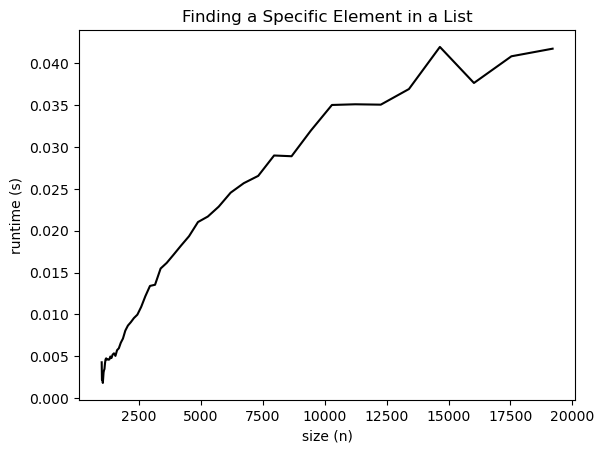

In [19]:
plt.plot(sizes, indexListEstimates, color = "black")
plt.title("Finding a Specific Element in a List")
plt.xlabel("size (n)")
plt.ylabel("runtime (s)")

Text(0, 0.5, 'runtime (s)')

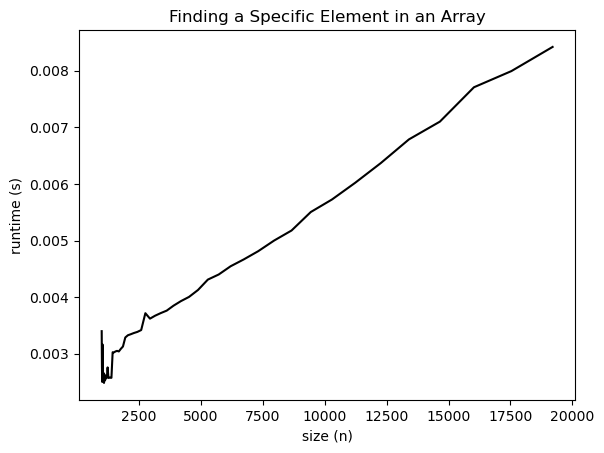

In [20]:
plt.plot(sizes, whereArrayEstimates, color ="black")
plt.title("Finding a Specific Element in an Array")
plt.xlabel("size (n)")
plt.ylabel("runtime (s)")

Based on the graphs above, finding an element in a Python list and a Numpy array both take **O(n)** time. But while finding elements are of linear time complexity for both data structures, it looks like <u>finding an element in a Numpy array is 10 times as fast as finding an element in a Python list</u>.

Now I will compare adding an element to the end of a Python list or Numpy array:

(0.05, 0.25)

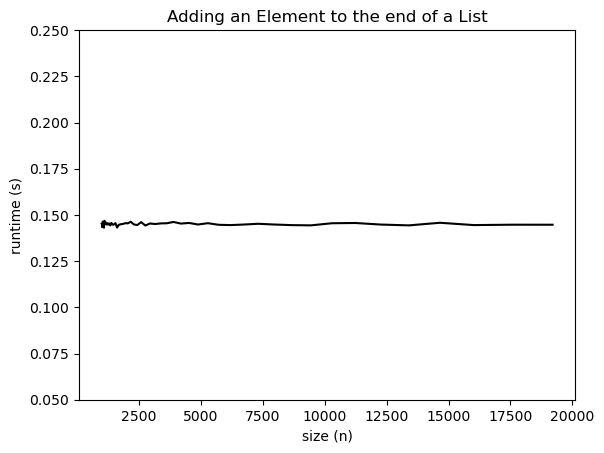

In [21]:
plt.plot(sizes, appendListEstimates, color = "black")
plt.title("Adding an Element to the end of a List")
plt.xlabel("size (n)")
plt.ylabel("runtime (s)")
plt.ylim(0.05, 0.25)

Text(0, 0.5, 'runtime (s)')

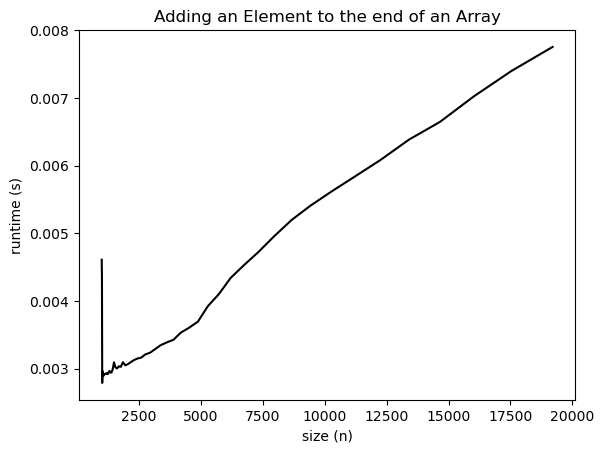

In [22]:
plt.plot(sizes, appendArrayEstimates, color = "black")
plt.title("Adding an Element to the end of an Array")
plt.xlabel("size (n)")
plt.ylabel("runtime (s)")

Based on the graphs above, adding an element to the end of a Python List takes **O(1)** time whereas adding an element to the end of a Numpy array takes **O(n)** time. Also, it should be noted that I ran the append() function for Python lists 1e6 times but the append() function for Numpy arrays 1000 times when finding the execution time. If we multiply 1000 to the runtimes of adding an element to the end of a Numpy array to make our units between the two graphs consistent, the average runtime of an adding an element to end of a Numpy array is between 3 and 7 seconds. <u> Not only does the runtime of adding an element to a Numpy array have a slower asymptotic complexity than adding an element to a Python list, but it is more than 10 times slower even at small sizes.</u> 

Now I will compare adding an element to a specificied index within a Python list and Numpy array:

(0.05, 0.25)

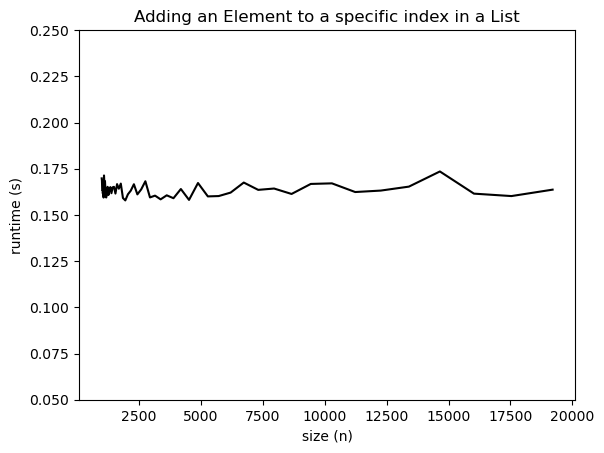

In [23]:
plt.plot(sizes, insertListEstimates, color = "black")
plt.title("Adding an Element to a specific index in a List")
plt.xlabel("size (n)")
plt.ylabel("runtime (s)")
plt.ylim(0.05, 0.25)

Text(0, 0.5, 'runtime (s)')

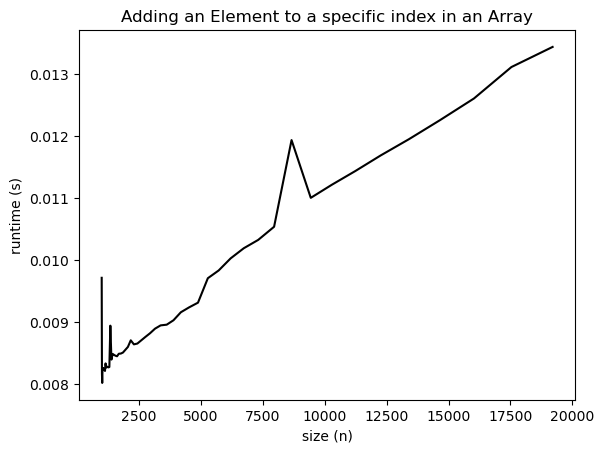

In [24]:
plt.plot(sizes, insertArrayEstimates, color = "black")
plt.title("Adding an Element to a specific index in an Array")
plt.xlabel("size (n)")
plt.ylabel("runtime (s)")

Based on the graphs above, adding an element to a specific index in a Python list takes **O(1)** time whereas adding an element to a specific index in a Numpy array takes **O(n)** time. <u>But although using Numpy arrays are more costly for larger data sets (n), it looks like Numpy arrays are around 10 times faster when n is small.</u> 

Now I will compare deleting the last element in a Python list and Numpy array:

(0.05, 0.25)

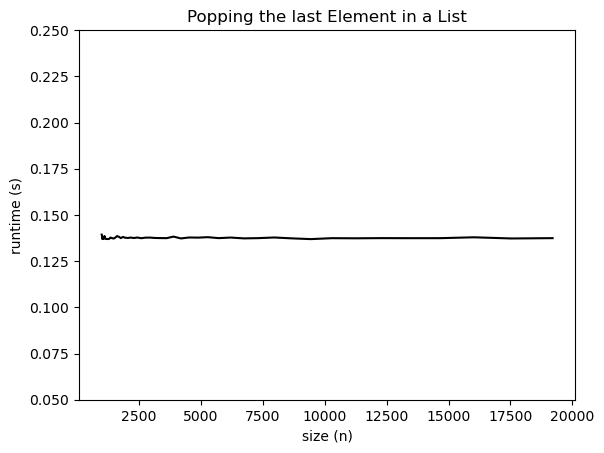

In [25]:
plt.plot(sizes, popListEstimates, color = "black")
plt.title("Popping the last Element in a List")
plt.xlabel("size (n)")
plt.ylabel("runtime (s)")
plt.ylim(.05, .25)

Text(0, 0.5, 'runtime (s)')

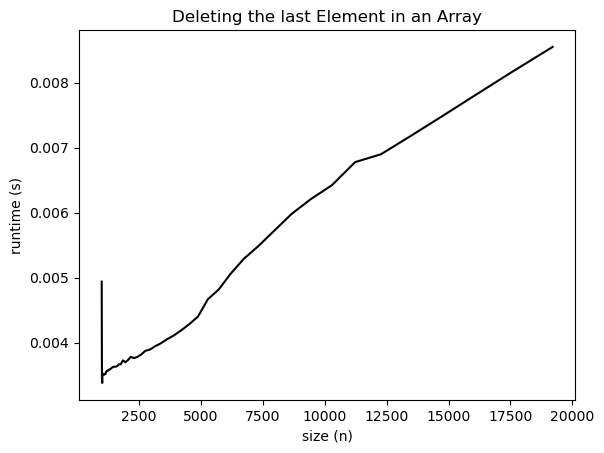

In [26]:
plt.plot(sizes, resizeArrayEstimates, color = "black")
plt.title("Deleting the last Element in an Array")
plt.xlabel("size (n)")
plt.ylabel("runtime (s)")

Based on the graphs above, it looks like deleting the last element in a Python list takes **O(1)** time whereas deleting the last element in a Numpy array takes **O(n)** time. Also, it should be noted that I ran the pop() function for Python lists 1e6 times but the resize() function for Numpy arrays 1000 times when finding the execution time for deleting the last element. If we multiply 1000 to the runtimes of deleting an element at the end of a Numpy array to make our units between the two graphs consistent, the average runtime of deleting the last element of a Numpy array is between 4 and 8 seconds. <u> Not only does the runtime of deleting the last element in Numpy array have a slower asymptotic complexity than deleting the last element in Python list, but it is more than 10 times slower even at small sizes.</u> 

Now I will compare deleting a specified element in a Python list and Numpy array:

Text(0, 0.5, 'runtime (s)')

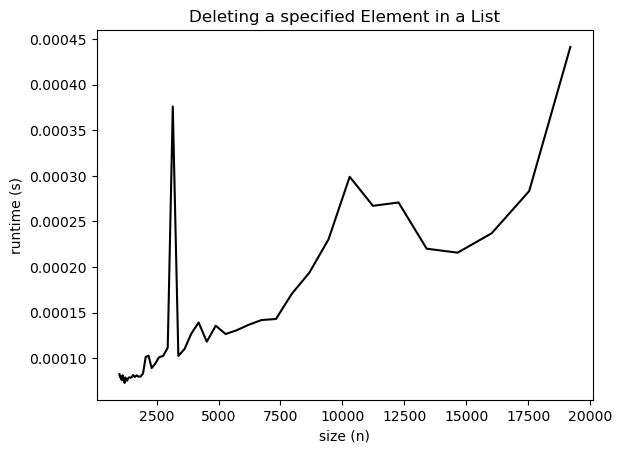

In [27]:
plt.plot(sizes, removeListEstimates, color = "black")
plt.title("Deleting a specified Element in a List")
plt.xlabel("size (n)")
plt.ylabel("runtime (s)")

Text(0, 0.5, 'runtime (s)')

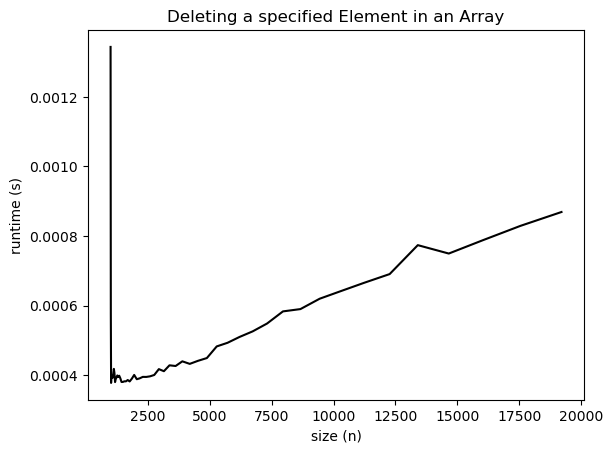

In [28]:
plt.plot(sizes, deleteArrayEstimates, color = "black")
plt.title("Deleting a specified Element in an Array")
plt.xlabel("size (n)")
plt.ylabel("runtime (s)")

Based on the graphs above, deleting a specific element in a Python list and Numpy array both take **O(n)** time. <u>While the times for deleting a specific element between the data structures are similar at small sizes, as n increases it looks like the time for deleting a specific element from a Numpy array increases slighly faster—though both are still linear. </u>

## Concluding Thoughts 

Our experiment has shown that finding a specific element is the only function that is more efficient when using a Numpy array instead of a Python list. Adding an element is always more efficient when using a Python list, and only when deleting a specific element are Python lists and Numpy arrays equal in efficieny. 
This agrees with the implementation of Python lists and Numpy arrays as Numpy arrays are supposed to be fixed in size, any function that involves changing the size of a data structure is bound to be less efficient when using a Numpy array instead of a Python list. For a data structure representing any data of a fixed size, Numpy arrays should be used. Otherwise Python lists prove to be more efficient. 
A though this experiment introduces is why Numpy is considered faster generally than Python. Even though are experiment showed that the majority of functions are more efficient when using Python lists—Numpy is still considered the standard for data storage and manipulation in Python. A further dive into how Numpy arrays store and process data as compared to Python lists could shed light onto the benefits of Numpy arrays vs. Python lists, and also teach us more about Python and its popular libraries. 